<a href="https://colab.research.google.com/github/ANGELINA-SHAJU/ANGELINA-SHAJU/blob/main/MNIST%20denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imageio



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.96MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.76MB/s]


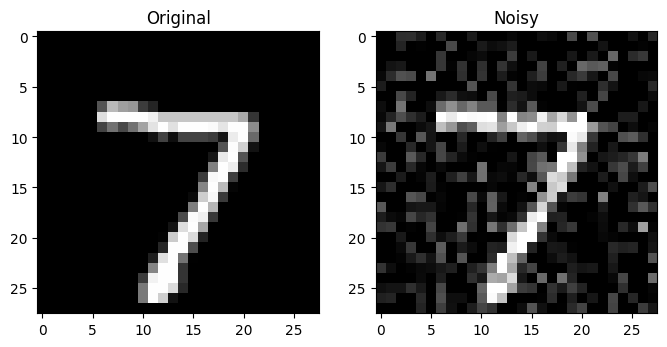

Iteration 0 | Loss: 0.17562
Iteration 50 | Loss: 0.08347
Iteration 100 | Loss: 0.08347
Iteration 150 | Loss: 0.08347
Iteration 200 | Loss: 0.08347
Iteration 250 | Loss: 0.08347
Iteration 300 | Loss: 0.08347
Iteration 350 | Loss: 0.08347
Iteration 400 | Loss: 0.08347
Iteration 450 | Loss: 0.08347
Iteration 500 | Loss: 0.08347
Iteration 550 | Loss: 0.08347
Iteration 600 | Loss: 0.08347
Iteration 650 | Loss: 0.08347
Iteration 700 | Loss: 0.08347
Iteration 750 | Loss: 0.08347
Iteration 800 | Loss: 0.08347
Iteration 850 | Loss: 0.08347
Iteration 900 | Loss: 0.08347
Iteration 950 | Loss: 0.08347
GIF saved as dip_denoising.gif!


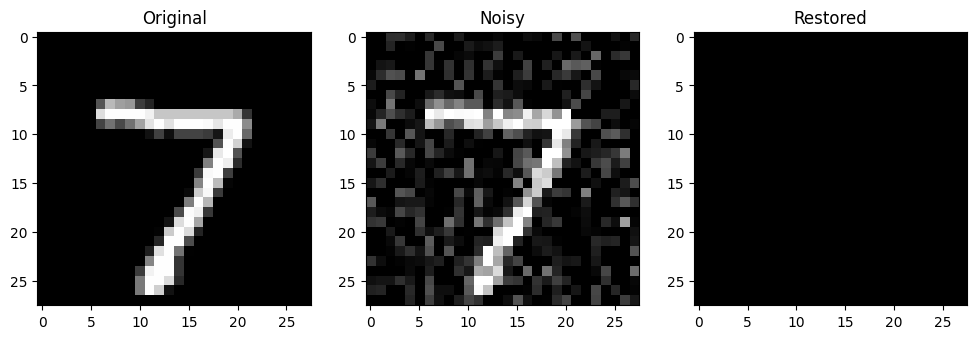

In [2]:
# DIP for Image Denoising - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import imageio

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST sample
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
image, _ = mnist[0]  # Pick first digit
image = image.to(device)

# Add Gaussian noise
noise_std = 0.2
noisy_image = image + noise_std * torch.randn_like(image)
noisy_image = torch.clamp(noisy_image, 0., 1.)

# Show original and noisy
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image.squeeze().cpu().numpy(), cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(noisy_image.squeeze().cpu().numpy(), cmap='gray')
plt.title('Noisy')
plt.show()

# -----------------------------
# Build a simple DIP network (ConvDecoder)
# -----------------------------

class DIPNet(nn.Module):
    def __init__(self):
        super(DIPNet, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(32, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 1, 3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# -----------------------------
# Initialize
# -----------------------------

net = DIPNet().to(device)

# Random input (noise)
input_noise = torch.randn(1, 32, 28, 28, device=device)

# Loss
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Store outputs for GIF
outputs = []

# -----------------------------
# Train
# -----------------------------
iterations = 1000

for i in range(iterations):
    optimizer.zero_grad()
    output = net(input_noise)
    loss = criterion(output, noisy_image.unsqueeze(0))
    loss.backward()
    optimizer.step()

    if i % 50 == 0:
        print(f"Iteration {i} | Loss: {loss.item():.5f}")
        out_img = output.detach().cpu().squeeze().numpy()
        outputs.append((out_img * 255).astype(np.uint8))

# -----------------------------
# Save GIF
# -----------------------------
imageio.mimsave('dip_denoising.gif', outputs, fps=5)
print("GIF saved as dip_denoising.gif!")

# Show final result
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(image.squeeze().cpu().numpy(), cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(noisy_image.squeeze().cpu().numpy(), cmap='gray')
plt.title('Noisy')
plt.subplot(1,3,3)
plt.imshow(output.squeeze().detach().cpu().numpy(), cmap='gray')
plt.title('Restored')
plt.show()
